# EDA 2 : AI COLLECTION COST EFFECTIVINESS

##  A. Import library

In [1]:
pip install lazypredict

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from imblearn.over_sampling import SMOTE
import random

#modeling
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,auc
import pickle

#library 5 model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

#pipe line model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

## B. Load Data

In [3]:
df = pd.read_csv('dataset_AI-COLLECTION_cost-effectiveness.csv')

print('dataset siap !')

dataset siap !


### 1.data teratas

In [4]:
df.head(30)

,RowNumber,CustomerId,debtor_name,CreditScore,Geography,Gender,debtor_age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,debtor_address,debtor_zip,debtor_rt,debtor_rw,debtor_marital_status,debtor_company
0,1,15634602,Cemplunk Zulaika,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Jalan Raya Setiabudhi No. 857,12188.00,6.00,10.00,Menikah,CV Nugroho Melani (Persero) Tbk
1,2,15647311,"Clara Padmasari, M.Pd",608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"Banjarbaru, KR 12188",56126.00,20.00,20.00,Menikah,UD Hidayat
2,3,15619304,"Puti Cinthia Oktaviani, S.IP",502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Jalan Cihampelas No. 4,98101.00,2.00,15.00,Cerai mati,UD Simanjuntak Padmasari (Persero) Tbk
3,4,15701354,"Lalita Astuti, M.TI.",699,France,Female,39,1,0.00,2,0,0,93826.63,0,"Pekanbaru, Sulawesi Selatan 56126",76993.00,19.00,16.00,Menikah,Perum Handayani Najmudin Tbk
4,5,15737888,Daliman Kusumo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Jl. Wonoayu No. 68,6297.00,1.00,1.00,Cerai hidup,PD Hardiansyah (Persero) Tbk
5,6,15574012,Hamima Yuliarti,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,"Semarang, Riau 98101",17655.00,8.00,9.00,Cerai mati,PT Firmansyah (Persero) Tbk
6,7,15592531,Kiandra Hassanah,822,France,Male,50,7,0.00,2,1,1,10062.80,0,Gg. Sentot Alibasa No. 781,60416.00,2.00,12.00,Cerai mati,PD Prasasta
7,8,15656148,Jayadi Rajata,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,"Pontianak, SU 76993",178.00,7.00,12.00,Cerai mati,CV Puspita
8,9,15792365,Farhunnisa Prastuti,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,Jl. Ronggowarsito No. 0,99838.00,16.00,7.00,Cerai hidup,CV Pratama Tbk
9,10,15592389,Janet Haryanti,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,"Tanjungpinang, NB 06297",59050.00,15.00,10.00,Belum menikah,UD Narpati Riyanti (Persero) Tbk


In [5]:
df.duplicated().sum()

0

### 2.data terbawah

In [6]:
df.tail(5)

,RowNumber,CustomerId,debtor_name,CreditScore,Geography,Gender,debtor_age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,debtor_address,debtor_zip,debtor_rt,debtor_rw,debtor_marital_status,debtor_company
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,"Bogor, Jawa Barat 88047",NaN,NaN,NaN,NaN,NaN
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Gang Ir. H. Djuanda No. 875,NaN,NaN,NaN,NaN,NaN
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,"Cimahi, JT 93140",NaN,NaN,NaN,NaN,NaN
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Gang Setiabudhi No. 8,NaN,NaN,NaN,NaN,NaN
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,"Tangerang, NT 42062",NaN,NaN,NaN,NaN,NaN


### 3. info data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RowNumber              10000 non-null  int64  
 1   CustomerId             10000 non-null  int64  
 2   debtor_name            10000 non-null  object 
 3   CreditScore            10000 non-null  int64  
 4   Geography              10000 non-null  object 
 5   Gender                 10000 non-null  object 
 6   debtor_age             10000 non-null  int64  
 7   Tenure                 10000 non-null  int64  
 8   Balance                10000 non-null  float64
 9   NumOfProducts          10000 non-null  int64  
 10  HasCrCard              10000 non-null  int64  
 11  IsActiveMember         10000 non-null  int64  
 12  EstimatedSalary        10000 non-null  float64
 13  Exited                 10000 non-null  int64  
 14  debtor_address         10000 non-null  object 
 15  deb

### 4. Jumlah data column dan data variable

In [8]:
df.shape

(10000, 20)

## C. Data cleaning

###1. mengecek missing value

In [9]:
df.isnull().sum()

RowNumber                   0
CustomerId                  0
debtor_name                 0
CreditScore                 0
Geography                   0
Gender                      0
debtor_age                  0
Tenure                      0
Balance                     0
NumOfProducts               0
HasCrCard                   0
IsActiveMember              0
EstimatedSalary             0
Exited                      0
debtor_address              0
debtor_zip               5000
debtor_rt                5000
debtor_rw                5000
debtor_marital_status    5000
debtor_company           5000
dtype: int64

tidak adanya missing value pada dataset ini

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RowNumber              10000 non-null  int64  
 1   CustomerId             10000 non-null  int64  
 2   debtor_name            10000 non-null  object 
 3   CreditScore            10000 non-null  int64  
 4   Geography              10000 non-null  object 
 5   Gender                 10000 non-null  object 
 6   debtor_age             10000 non-null  int64  
 7   Tenure                 10000 non-null  int64  
 8   Balance                10000 non-null  float64
 9   NumOfProducts          10000 non-null  int64  
 10  HasCrCard              10000 non-null  int64  
 11  IsActiveMember         10000 non-null  int64  
 12  EstimatedSalary        10000 non-null  float64
 13  Exited                 10000 non-null  int64  
 14  debtor_address         10000 non-null  object 
 15  deb

### 2. menghapus variable yang tidak penting / tidak di pakai

In [11]:
del df['RowNumber']
del df['CustomerId']
del df['Geography']
del df['Balance']
del df['HasCrCard']
del df['IsActiveMember']
del df['debtor_address']
del df['debtor_zip']
del df['debtor_rt']
del df['debtor_rw']
del df['debtor_marital_status']
del df['debtor_company']

### 3. menambah variable yang baru

In [12]:
# Membuat variabel baru dengan 10.000 data sesuai dengan ketentuan
new_variable = [random.randint(0, 4) for _ in range(10000)]

# Mendefinisikan kategori sesuai dengan nilai variabel baru
debtor_occupation = {
    0: 'Buruh',
    1: 'Pegawai Negeri',
    2: 'Pegawai Swasta',
    3: 'Profesional',
    4: 'Pengusaha'
}

# Mengubah nilai variabel baru sesuai dengan kategori_mapping
new_variable_mapped = [debtor_occupation[val] for val in new_variable]

# Menambahkan variabel baru ke DataFrame
df['debtor_occupation'] = new_variable_mapped


### 4. mengecek kembali nama variable yang tersisa yang telah di hapus dan di tambahkan

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   debtor_name        10000 non-null  object 
 1   CreditScore        10000 non-null  int64  
 2   Gender             10000 non-null  object 
 3   debtor_age         10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   NumOfProducts      10000 non-null  int64  
 6   EstimatedSalary    10000 non-null  float64
 7   Exited             10000 non-null  int64  
 8   debtor_occupation  10000 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 703.2+ KB


In [14]:
df = df.rename(columns = {"NumOfProducts": "arrear_amount", "Exited": "Efficient_HumanResources", "EstimatedSalary" : "loan_amount"})

In [15]:
df.head()

,debtor_name,CreditScore,Gender,debtor_age,Tenure,arrear_amount,loan_amount,Efficient_HumanResources,debtor_occupation
0,Cemplunk Zulaika,619,Female,42,2,1,101348.88,1,Buruh
1,"Clara Padmasari, M.Pd",608,Female,41,1,1,112542.58,0,Buruh
2,"Puti Cinthia Oktaviani, S.IP",502,Female,42,8,3,113931.57,1,Pengusaha
3,"Lalita Astuti, M.TI.",699,Female,39,1,2,93826.63,0,Pegawai Negeri
4,Daliman Kusumo,850,Female,43,2,1,79084.10,0,Buruh


## D. EDA ( EXPLORATORY DATA ANALYSIS)

### 1 Mengecek Kembali apakah ada data yang terduplikasi, missing value atau tidak

In [16]:
df.duplicated().sum()

0

In [17]:
df.isna().sum()

debtor_name                 0
CreditScore                 0
Gender                      0
debtor_age                  0
Tenure                      0
arrear_amount               0
loan_amount                 0
Efficient_HumanResources    0
debtor_occupation           0
dtype: int64

### 2 Data Statistik

In [18]:
df.describe()

,CreditScore,debtor_age,Tenure,arrear_amount,loan_amount,Efficient_HumanResources
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,650.53,38.92,5.01,1.53,100090.24,0.20
std,96.65,10.49,2.89,0.58,57510.49,0.40
min,350.00,18.00,0.00,1.00,11.58,0.00
25%,584.00,32.00,3.00,1.00,51002.11,0.00
50%,652.00,37.00,5.00,1.00,100193.91,0.00
75%,718.00,44.00,7.00,2.00,149388.25,0.00
max,850.00,92.00,10.00,4.00,199992.48,1.00


In [19]:
df[['debtor_name', 'debtor_occupation', 'loan_amount','Tenure','arrear_amount', 'CreditScore', 'debtor_age','Efficient_HumanResources']]

,debtor_name,debtor_occupation,loan_amount,Tenure,arrear_amount,CreditScore,debtor_age,Efficient_HumanResources
0,Cemplunk Zulaika,Buruh,101348.88,2,1,619,42,1
1,"Clara Padmasari, M.Pd",Buruh,112542.58,1,1,608,41,0
2,"Puti Cinthia Oktaviani, S.IP",Pengusaha,113931.57,8,3,502,42,1
3,"Lalita Astuti, M.TI.",Pegawai Negeri,93826.63,1,2,699,39,0
4,Daliman Kusumo,Buruh,79084.10,2,1,850,43,0
...,...,...,...,...,...,...,...,...
9995,Obijiaku,Pengusaha,96270.64,5,2,771,39,0
9996,Johnstone,Pegawai Swasta,101699.77,10,1,516,35,0
9997,Liu,Pegawai Swasta,42085.58,7,1,709,36,1
9998,Sabbatini,Pegawai Negeri,92888.52,3,2,772,42,1


#### data statistik : loan_amount

In [20]:
df['loan_amount'].max()

199992.48

In [21]:
df['loan_amount'].min()

11.58

In [22]:
df['loan_amount'].mean()

100090.239881

#### data statistik : Tenor

In [23]:
df['Tenure'].max()

10

In [24]:
df['Tenure'].min()

0

In [25]:
df['Tenure'].mean()

5.0128

#### data statistik : arrers amount

In [26]:
df['arrear_amount'].max()

4

In [27]:
df['arrear_amount'].min()

1

In [28]:
df['arrear_amount'].mean()

1.5302

### 2. Data Visualisasi

#### barplot : Efficient_Use_of_Human_Resources VS  arrears_amount

([<matplotlib.axis.XTick at 0x79f0143455d0>,
 [Text(0, 0, 'tidak efesien dan efektif'), Text(1, 0, 'efesiens dan efektif')])

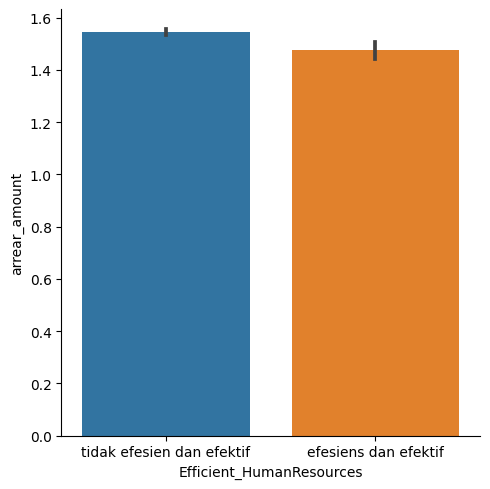

In [29]:
barplot_1 = df[['Efficient_HumanResources', 'arrear_amount']]
sns.catplot(data=barplot_1, x='Efficient_HumanResources', y='arrear_amount', kind='bar')
plt.xticks(ticks=(0,1),labels=['tidak efesien dan efektif','efesiens dan efektif'])

bisa dilihat bahwa semakin tinggi jumlah  yang tidak melakukan tunggakan yang di buat oleh peminjam maka semakin  efektif dan efesiensi peminjam melakukan peminjaman

([<matplotlib.axis.XTick at 0x79f013f77400>,
 [Text(0, 0, 'tidak efesien dan efektif'), Text(1, 0, 'efesiens dan efektif')])

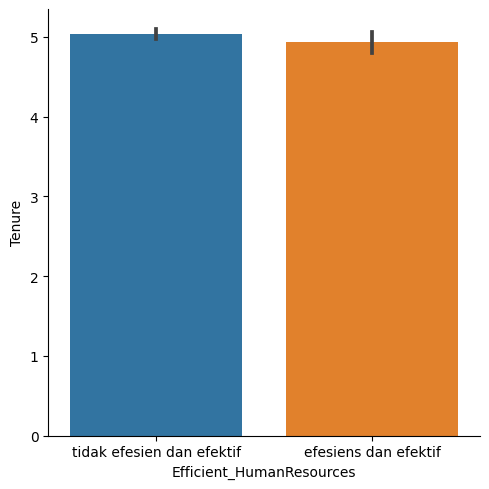

In [30]:
barplot_2 = df[['Efficient_HumanResources', 'Tenure']]
sns.catplot(data=barplot_2, x='Efficient_HumanResources', y='Tenure', kind='bar')
plt.xticks(ticks=(0,1),labels=['tidak efesien dan efektif','efesiens dan efektif'])

bisa dilihat jangka waktu yang diberikan oleh peminjam dalam bulan tidak efektif jika di bayarkan tidak tepat waktu

#### histogram plot

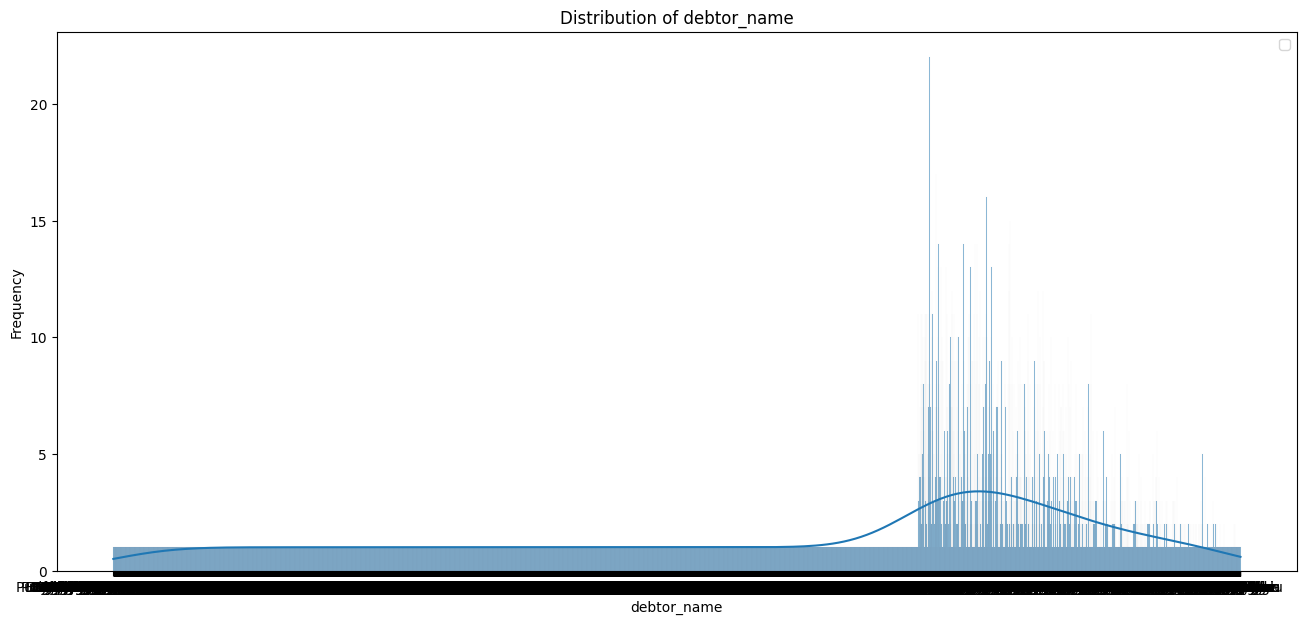

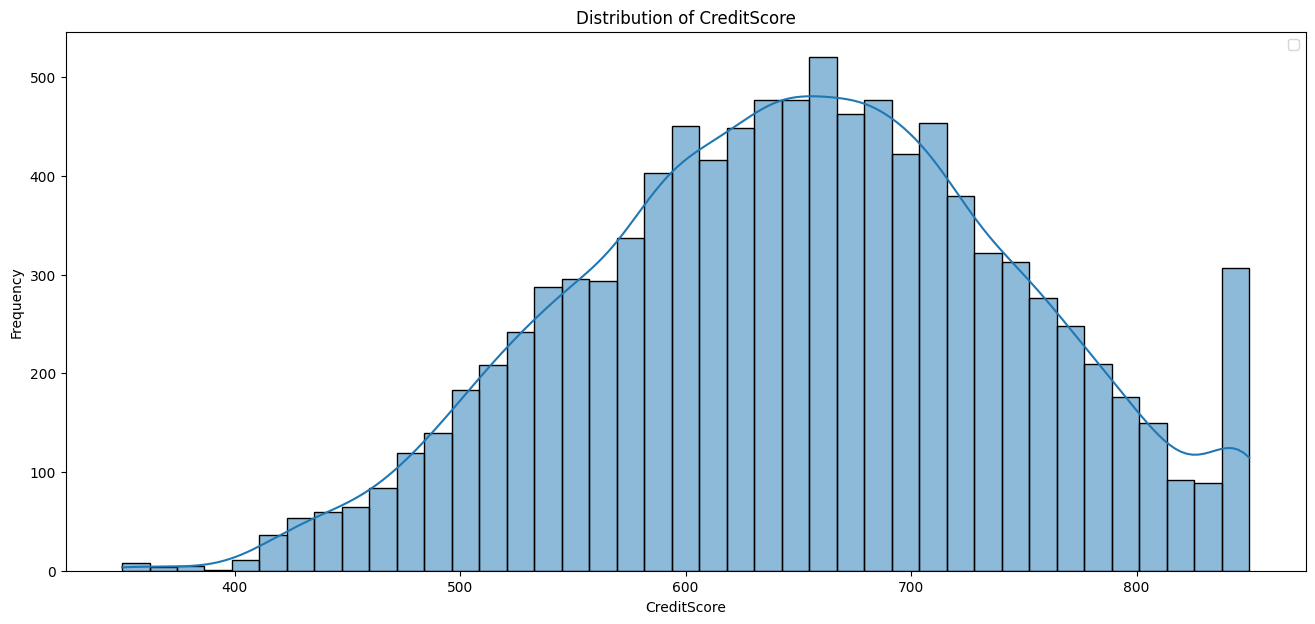

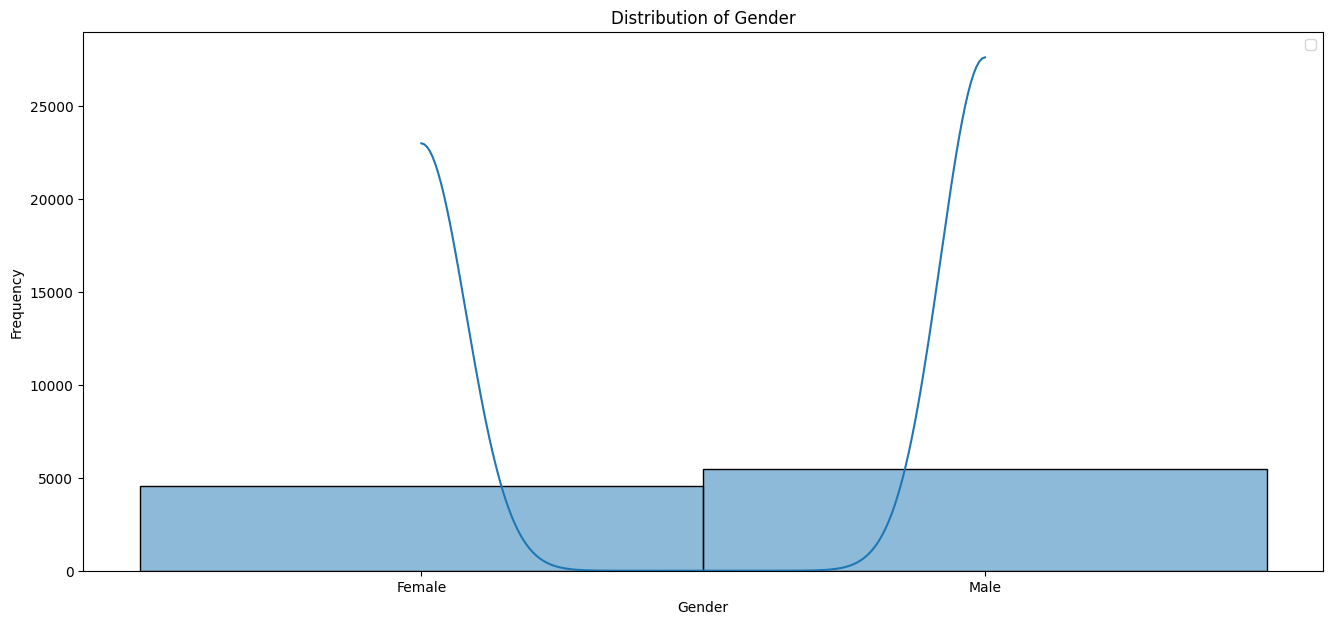

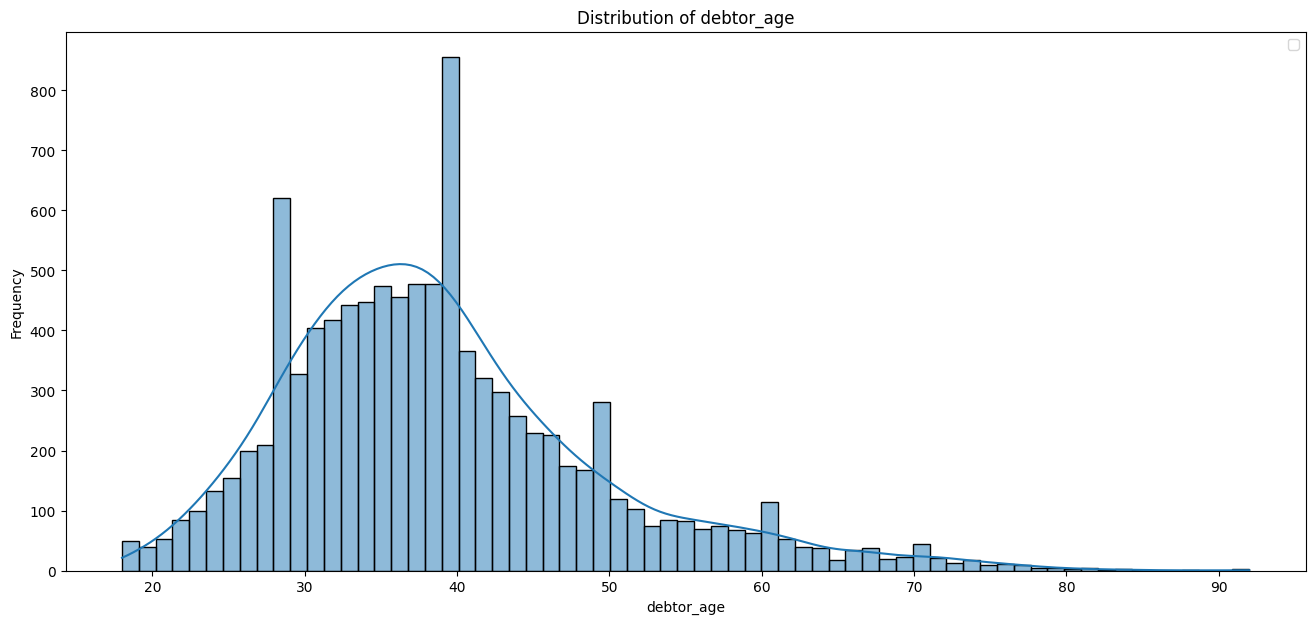

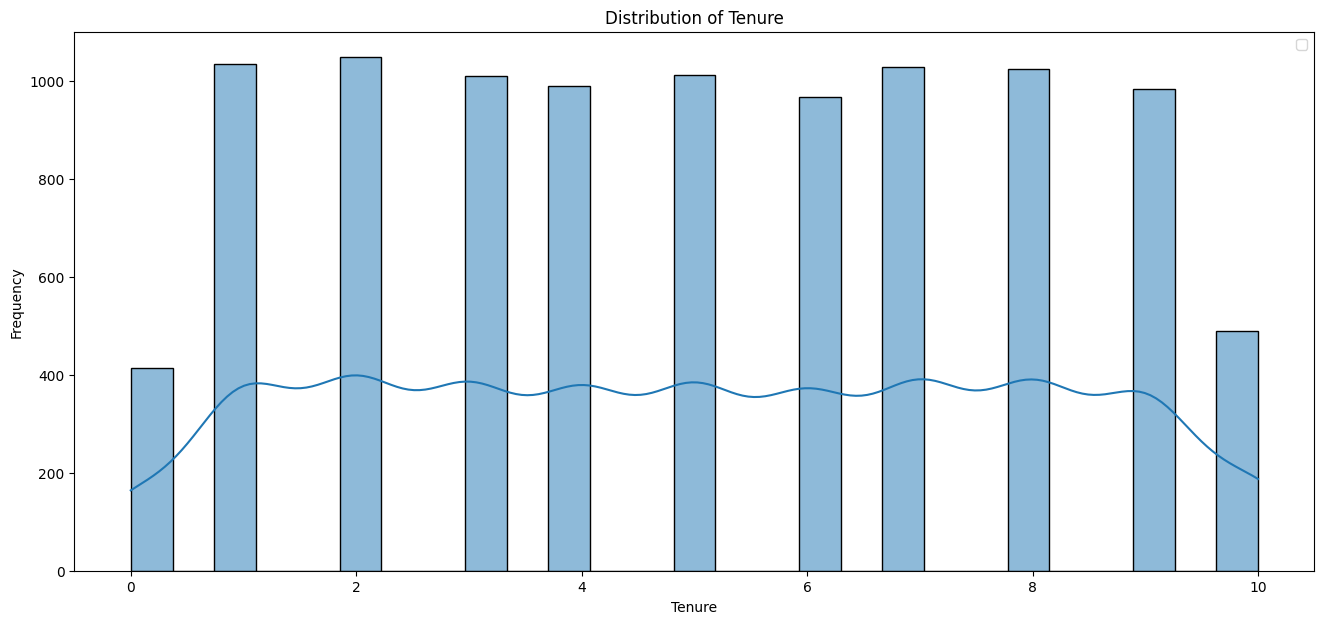

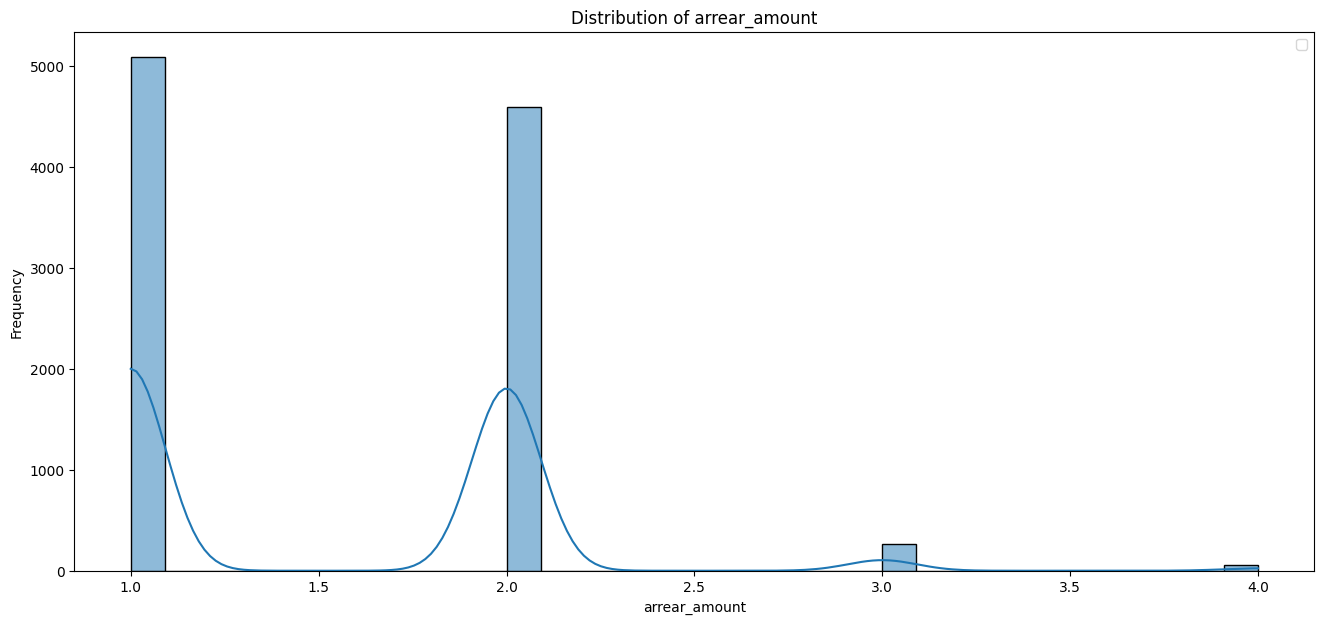

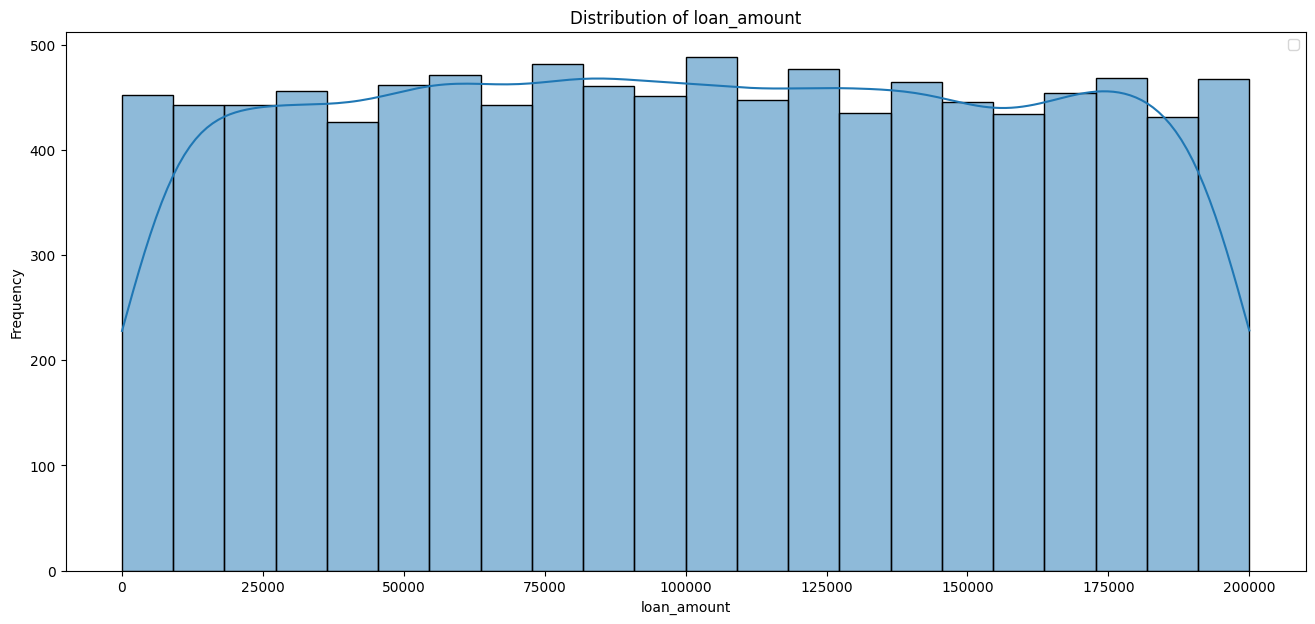

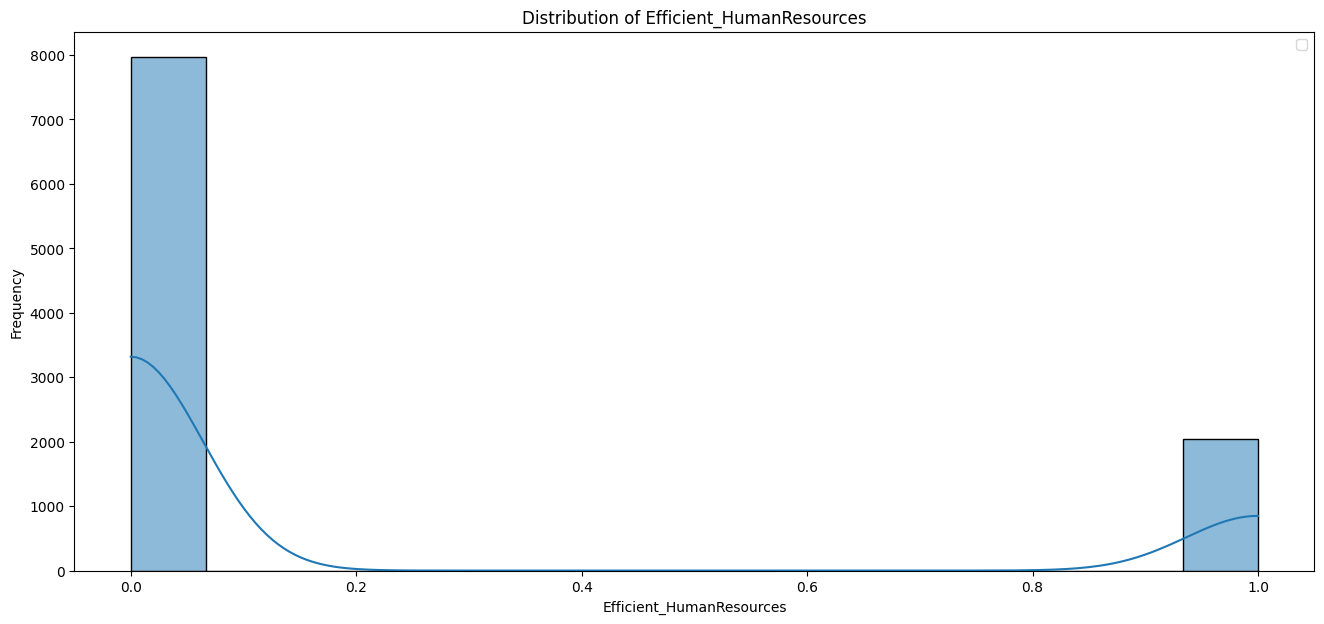

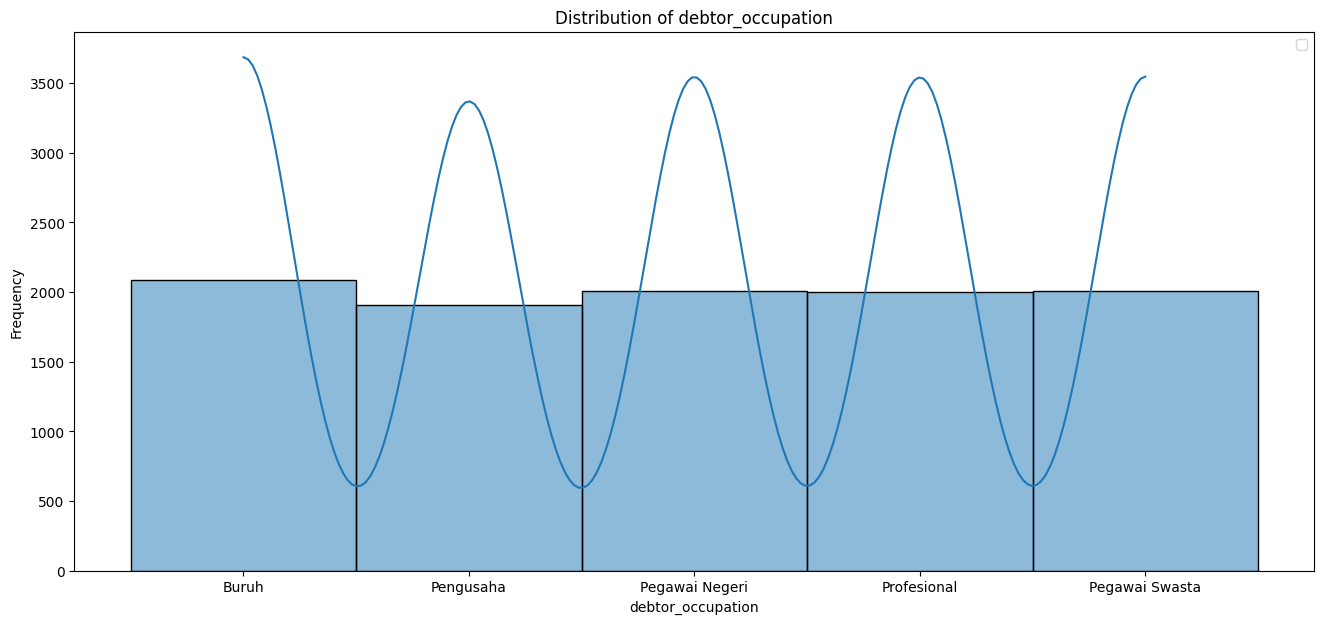

In [31]:
for column in df.columns:
    plt.figure(figsize=(16, 7))
    sns.histplot(df[column], kde=True)# label = 'Skewness: %.2f'%(df[column].skew()))
    plt.title(f'Distribution of {column}')
    plt.legend(loc = 'best')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### Pie Chart

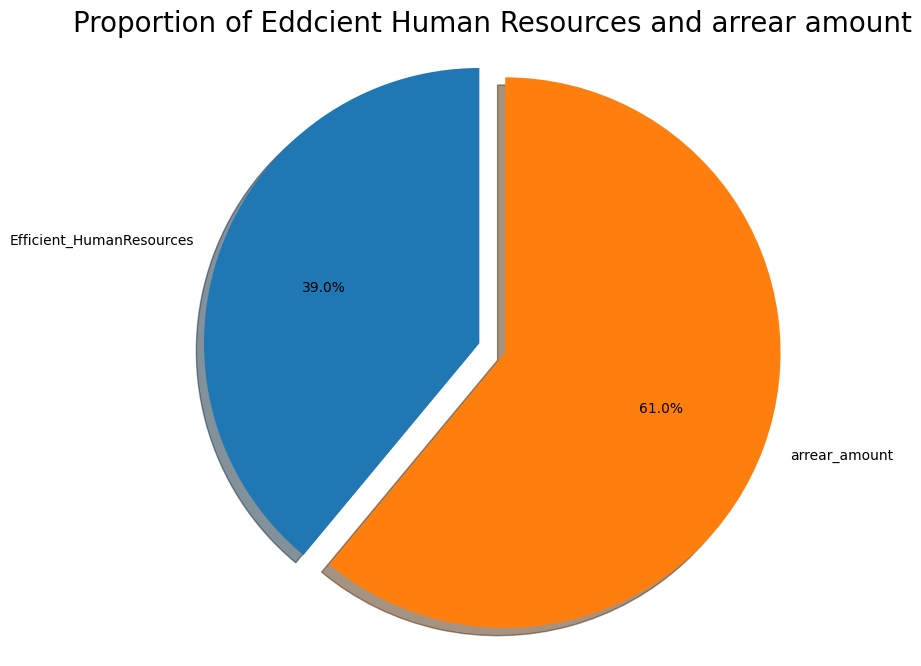

In [32]:
labels = 'Efficient_HumanResources', 'arrear_amount'
sizes = [df.arrear_amount[df['arrear_amount']==1].count(), df.Efficient_HumanResources[df['Efficient_HumanResources']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Eddcient Human Resources and arrear amount", size = 20)
plt.show()

pembagian propresi antara efesiensi dan efektif dan jumlah tunggakan oleh debitur / peminjam bisa di liat tingkat efesiensinya masih rendah dan yang masi nunggak masih banyak

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   debtor_name               10000 non-null  object 
 1   CreditScore               10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   debtor_age                10000 non-null  int64  
 4   Tenure                    10000 non-null  int64  
 5   arrear_amount             10000 non-null  int64  
 6   loan_amount               10000 non-null  float64
 7   Efficient_HumanResources  10000 non-null  int64  
 8   debtor_occupation         10000 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 703.2+ KB


#### Heatmap : melihat korelasi antar variable

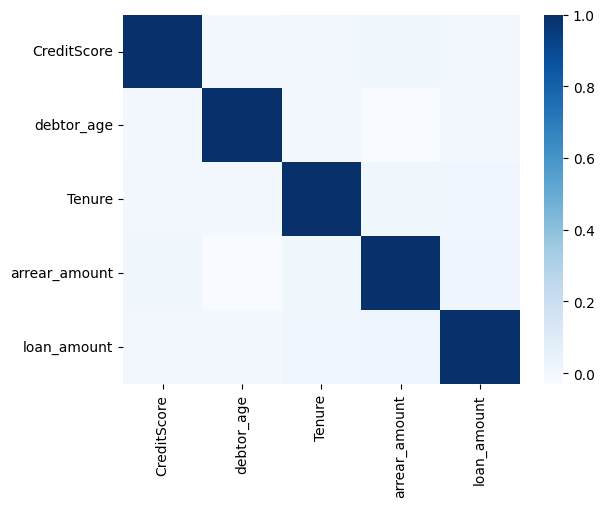

In [34]:
matriks_korelasi = df.drop(columns=['Efficient_HumanResources'], inplace=False).corr()
sns.heatmap(matriks_korelasi, cmap='Blues');

#### Displot : melihat informasi mengenai jumlah peminjaman paling banyak

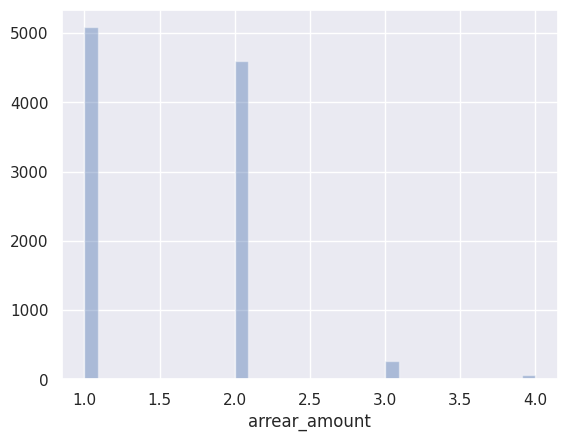

In [35]:
sns.set(color_codes = True)
sns.distplot(df.arrear_amount, kde = False);

bisa dilihat bahwa grafik di atas menunjukkan kalau yang tidak ada tunggakan itu grafiknya tinggi yang menandakan efektif dalam peminjaman karna tidak adanya tunggakan.

#### preprocessing data

In [36]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column name, occupation
df['debtor_name']= label_encoder.fit_transform(df['debtor_name'])
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['debtor_occupation'] = label_encoder.fit_transform(df['debtor_occupation'])

In [37]:
df.isna().sum()

debtor_name                 0
CreditScore                 0
Gender                      0
debtor_age                  0
Tenure                      0
arrear_amount               0
loan_amount                 0
Efficient_HumanResources    0
debtor_occupation           0
dtype: int64

In [38]:
df.columns

Index(['debtor_name', 'CreditScore', 'Gender', 'debtor_age', 'Tenure',
       'arrear_amount', 'loan_amount', 'Efficient_HumanResources',
       'debtor_occupation'],
      dtype='object')

In [39]:
X = df.drop('Efficient_HumanResources', axis=1)  # Variabel independen
y = df['Efficient_HumanResources']  # Variabel dependen atau target

In [40]:
X

,debtor_name,CreditScore,Gender,debtor_age,Tenure,arrear_amount,loan_amount,debtor_occupation
0,794,619,0,42,2,1,101348.88,0
1,967,608,0,41,1,1,112542.58,0
2,4812,502,0,42,8,3,113931.57,3
3,3601,699,0,39,1,2,93826.63,1
4,1132,850,0,43,2,1,79084.10,0
...,...,...,...,...,...,...,...,...
9995,4398,771,1,39,5,2,96270.64,3
9996,3162,516,1,35,10,1,101699.77,2
9997,3775,709,0,36,7,1,42085.58,2
9998,5415,772,1,42,3,2,92888.52,1


### Heat Map

#### 1 melihat korelasi antar variable menggunakan heatmap

<Axes: >

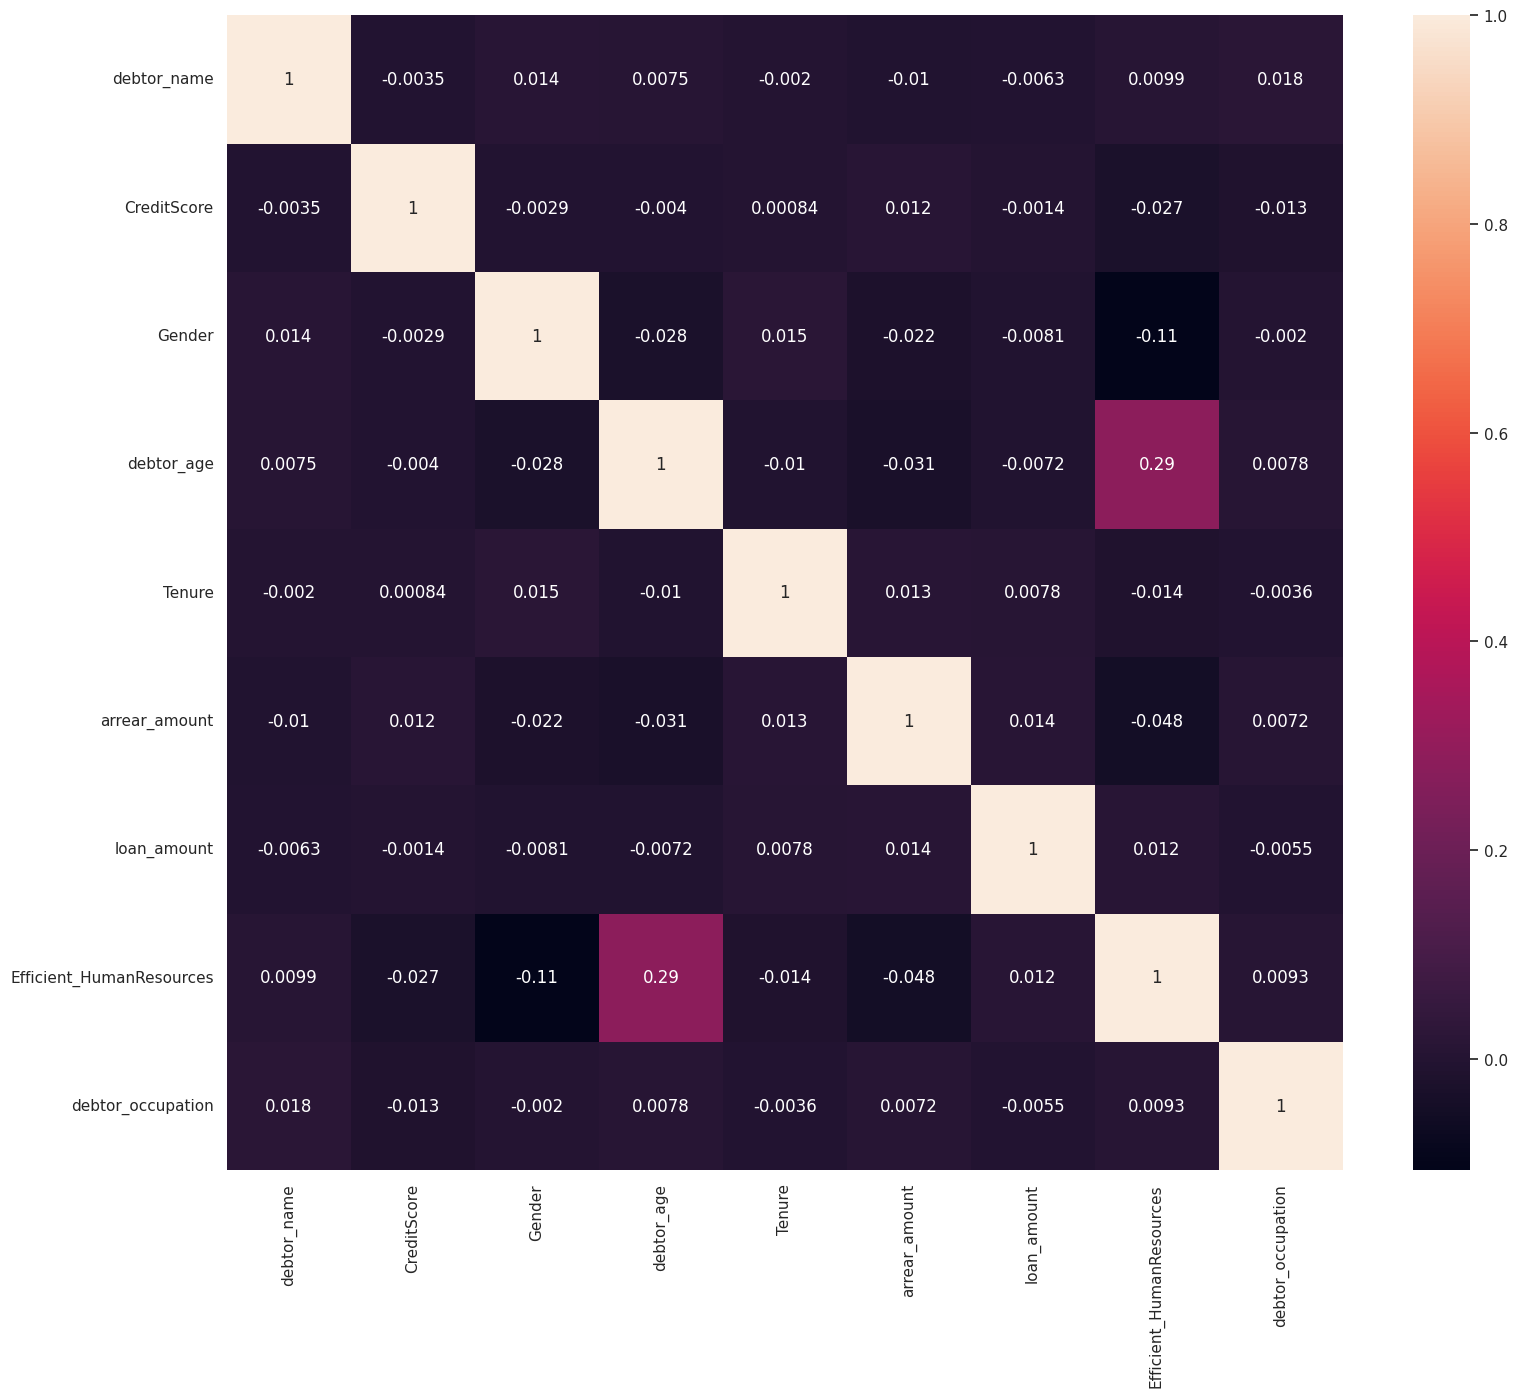

In [41]:
plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot= True)

# E. LAZY PREDICT

### 1. mengecek korelasi antar variable yang akan di masukkan dan di pakai di dalam pemodelan

<Axes: >

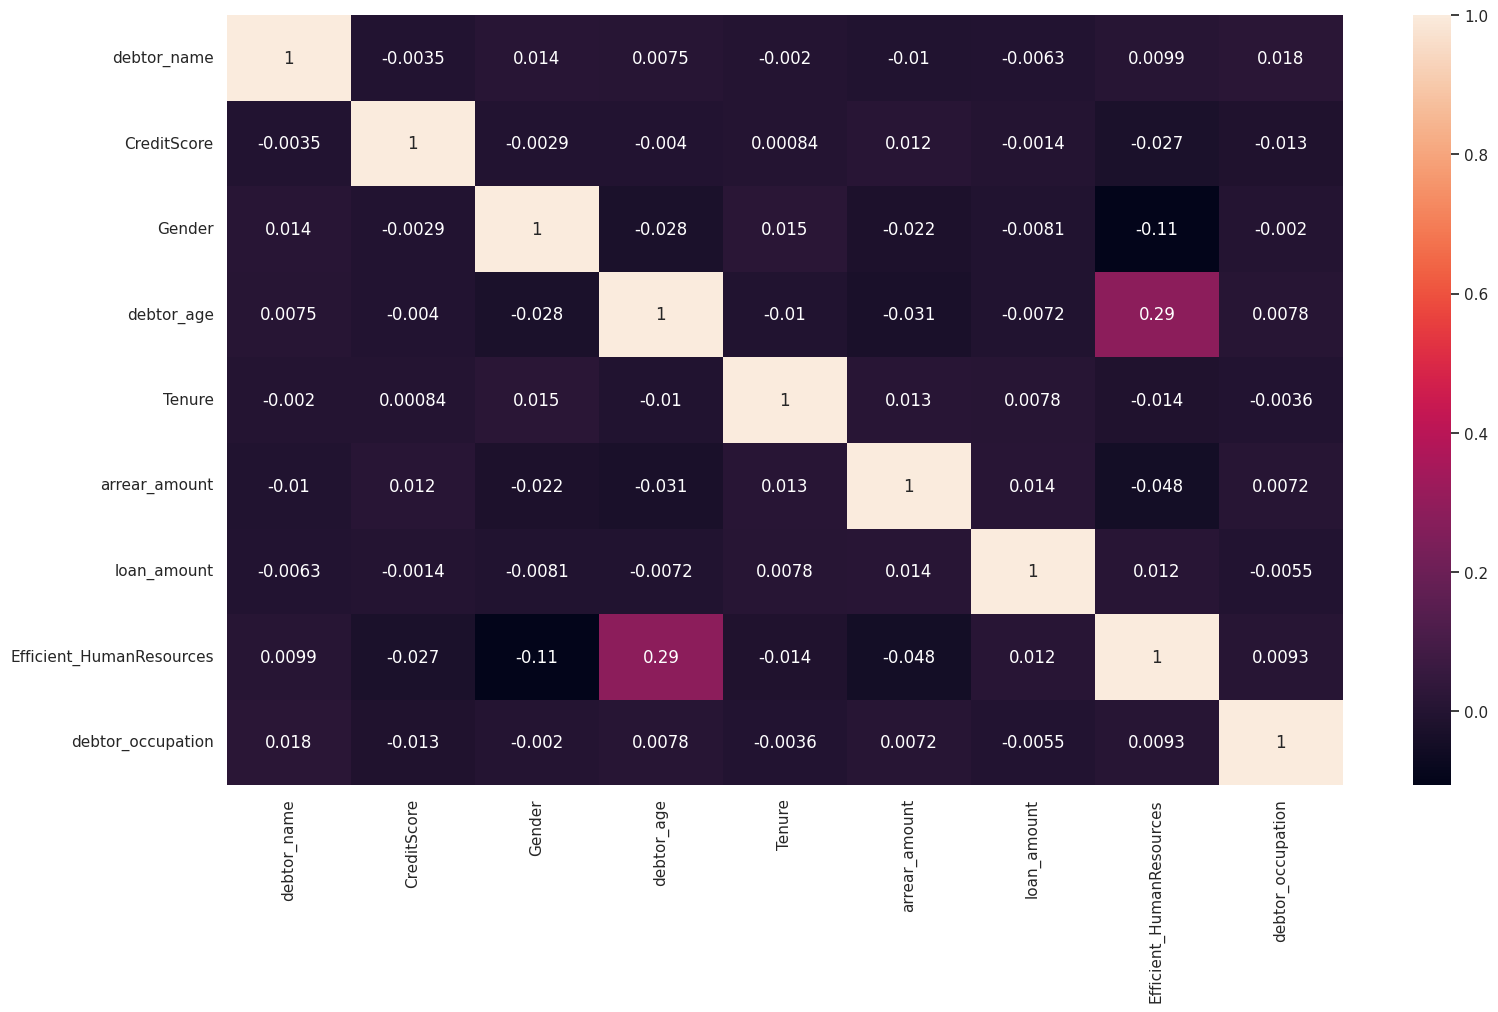

In [42]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot= True)

### 2. menginisialisasikan variable sumbuh X dan Y yang akan dilakukan training dan testing data menggunakan lazypredict

In [43]:
X = df.drop('Efficient_HumanResources', axis=1)  # Variabel independen
y = df['Efficient_HumanResources']  # Variabel dependen atau target

### 3. melakukan training data dengan nilai perbandingan 70 :30

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 4. melakukan prediksi menggunakan lazyclassifier dari library lazypredict

In [45]:
clf = LazyClassifier()
models, predictions = clf.fit(X_train, X_test, y_train,y_test)

print(models)


100%|██████████| 29/29 [00:11<00:00,  2.42it/s]

[LightGBM] [Info] Number of positive: 1453, number of negative: 5547
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000592 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.207571 -> initscore=-1.339627
[LightGBM] [Info] Start training from score -1.339627
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.85               0.69     0.69      0.84   
NearestCentroid                    0.70               0.69     0.69      0.73   
XGBClassifier                      0.84               0.68     0.68      0.83   
LGBMClassifier                     0.84               0.67     0.67      0.83   
RandomForestClassifier

# F. 5 models yang akan di pakai

## 1 MODELS Random Forest

### 1.1 split data menjadi data latih dan data uji

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1.2 inisialisasikan model Random Forest

In [47]:
rf_model = RandomForestClassifier(random_state=42)

### 1.3 latih models

In [48]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 1.4 prediksi pada data uji

In [49]:
y_pred1 = rf_model.predict(X_test)

### 1.5 evaluasi performa dan classification report

In [50]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred1)
print(f"Akurasi: {accuracy:.2f}")

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred1))

Akurasi: 0.84
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      2416
           1       0.66      0.36      0.47       584

    accuracy                           0.84      3000
   macro avg       0.76      0.66      0.69      3000
weighted avg       0.82      0.84      0.82      3000



In [51]:
y_pred1 = rf_model.predict(X_test)
print("Test score:", rf_model.score(X_test, y_test))
print("Train score:", rf_model.score(X_train, y_train))

Test score: 0.8396666666666667
Train score: 0.9998571428571429


## 2 MODEL DecisionTreeClassifier

### 2.1 split data menjadi data latih dan data uji

In [52]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size =0.3, random_state =42)

### 2.2 Inisialisasi model Logistic regression

In [53]:
dt_model = DecisionTreeClassifier(random_state = 42)

### 2.3 latih models

In [54]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 2.4 lakukan prediksi pada data uji

In [55]:
y_pred2 = dt_model.predict(X_test)

### 2.5 evaluasi performa model & cetak hasil evaluasi

In [56]:
accuracy = accuracy_score(y_test, y_pred2)
report = classification_report(y_test, y_pred2)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.761
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      5547
           1       0.43      0.44      0.44      1453

    accuracy                           0.76      7000
   macro avg       0.64      0.64      0.64      7000
weighted avg       0.76      0.76      0.76      7000



In [57]:
y_pred2 = dt_model.predict(X_test)
print("Test score:", dt_model.score(X_test, y_test))
print("Train score:", dt_model.score(X_train, y_train))

Test score: 0.761
Train score: 1.0


## 3 MODEL ExtraTreesClassifier

### 3.1 split data menjadi data latih dan data uji

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =42)

### 3.2 Inisialisasi model ExtraTreesClassifier

In [59]:
etc_model = ExtraTreesClassifier(random_state = 42)

### 3.3 Latih Model

In [60]:
etc_model.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

### 3.4 lakukan prediksi pada data uji

In [61]:
y_pred3 = etc_model.predict(X_test)

### 3.5 evaluasi performa model dan cetak hasil evaluasi

In [62]:
# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred3)
report = classification_report(y_test, y_pred3)

# Cetak hasil evaluasi
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.8346666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2416
           1       0.67      0.30      0.41       584

    accuracy                           0.83      3000
   macro avg       0.76      0.63      0.66      3000
weighted avg       0.82      0.83      0.81      3000



In [63]:
y_pred3 = etc_model.predict(X_test)
print("Test score:", etc_model.score(X_test, y_test))
print("Train score:", etc_model.score(X_train, y_train))

Test score: 0.8346666666666667
Train score: 1.0


## 4 MODEL AdaBoostClassifier

### 4.1 split data menjadi data latih dan data uji

In [64]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.3, random_state = 42)

### 4.2 inisialisasi KNeighborsClassifier

In [65]:
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

### 4.3 Latih model

In [66]:
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

### 4.4 lakukan prediksi pada data uji

In [67]:
y_pred4 = adaboost_model.predict(X_test)

### 4.5 Evaluasi performa model dan hasil evaluasi

In [68]:
# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred4)
report = classification_report(y_test, y_pred4)

# Cetak hasil evaluasi
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.828
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5547
           1       0.63      0.41      0.50      1453

    accuracy                           0.83      7000
   macro avg       0.75      0.67      0.70      7000
weighted avg       0.81      0.83      0.81      7000



In [69]:
y_pred4 = adaboost_model.predict(X_test)
print("Test score:", adaboost_model.score(X_test, y_test))
print("Train score:", adaboost_model.score(X_train, y_train))

Test score: 0.828
Train score: 0.8543333333333333


## 5 MODEL LGBMClassifier

### 5.1 split data

In [70]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.3, random_state = 42)

### 5.2 Inisialisasi model LGBMClassifer

In [71]:
lgbm_model = LGBMClassifier()

### 5.3 Latih model

In [72]:
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 584, number of negative: 2416
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 848
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.194667 -> initscore=-1.419968
[LightGBM] [Info] Start training from score -1.419968


LGBMClassifier()

### 5.4 Lakupan prediksi pada data uji

In [73]:
y_pred5 = lgbm_model.predict(X_test)

### 5.5 Evaluasi performa model dan cetak hasil evaluasi

In [74]:
# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred5)
report = classification_report(y_test, y_pred5)

# Cetak hasil evaluasi
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.8274285714285714
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      5547
           1       0.64      0.39      0.48      1453

    accuracy                           0.83      7000
   macro avg       0.75      0.66      0.69      7000
weighted avg       0.81      0.83      0.81      7000



In [75]:
y_pred3 = lgbm_model.predict(X_test)
print("Test score:", lgbm_model.score(X_test, y_test))
print("Train score:", lgbm_model.score(X_train, y_train))

Test score: 0.8274285714285714
Train score: 0.969


# G SAVING MODEL IN JOBLIB

## 1 saving & load models random forest

In [76]:
joblib.dump(rf_model, 'rf_model.joblib')

['rf_model.joblib']

In [77]:
rf_model = joblib.load('rf_model.joblib')

In [78]:
predictions_rf_model = rf_model.predict(X_test)
round(accuracy_score(y_test, predictions_rf_model), 3)

1.0

## 2 saving & load models DecisionTreeClassifier

In [79]:
joblib.dump (dt_model, 'dt_model.joblib')

['dt_model.joblib']

In [80]:
dt_model = joblib.load('dt_model.joblib')

In [81]:
dt_model = y_pred2 = dt_model.predict(X_test)
round(accuracy_score(y_test, dt_model), 3)

0.761

## 3 saving & load models ExtraTreesClassifier

In [82]:
joblib.dump(etc_model, 'etc_model.joblib')

['etc_model.joblib']

In [83]:
etc_model = joblib.load('etc_model.joblib')

In [84]:
predictions_etc = etc_model.predict(X_test)
round(accuracy_score(y_test, predictions_etc), 3)

1.0

## 4 saving & load models adaboostlassifier

In [85]:
joblib.dump(adaboost_model, 'adaboost_model.joblib')

['adaboost_model.joblib']

In [86]:
xc_model = joblib.load('adaboost_model.joblib')

In [87]:
predictions_adaboost_model = adaboost_model.predict(X_test)
round(accuracy_score(y_test, predictions_adaboost_model), 3)

0.828

## 5 saving & load models LGBMClassifier

In [88]:
joblib.dump(lgbm_model, 'lgbm_model.joblib')

['lgbm_model.joblib']

In [89]:
lgbm_model = joblib.load('lgbm_model.joblib')

In [90]:
predictions_lgbm = lgbm_model.predict(X_test)
round(accuracy_score(y_test, predictions_lgbm), 3)

0.827

# H Pipeline Model

### 1 split data menjadi data latih dan data uji

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### 2 membuat pipline dari model adaboostclassifier

In [92]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler untuk preprocessing data (opsional)
    ('classifier', AdaBoostClassifier(n_estimators=50, random_state=42))  # Classifier
])

### 3 melakukan fit trasnform pipline

In [93]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', AdaBoostClassifier(random_state=42))])

### 4 melakukan prediksi

In [94]:
y_predpip = pipeline.predict(X_test)

In [95]:
accuracy = accuracy_score(y_test, y_predpip)

print(f"Akurasi model: {accuracy * 100:.2f}%")

Akurasi model: 84.83%


### 5 menyimpan model pipeline ke dalam joblib

In [96]:
joblib.dump(pipeline, 'adaboost_model_pipeline2.joblib')

['adaboost_model_pipeline2.joblib']

In [97]:
pipeline = joblib.load('adaboost_model_pipeline2.joblib')

In [98]:
predictions_pipeline= pipeline.predict(X_test)
round(accuracy_score(y_test, predictions_pipeline), 3)

0.848

# I Conclution

berdasarkan hasil training & pemodelan data  menggunakan lazypredict dan secara manual dapat di simpulkan model yang akurasi score yang baik diantara model lainnya yaitu model adaboostclassifer yang telah di lakukan pipeline transform yang sudah di prediksi dan di simpan dalam format joblib.